In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load BERT Model and Tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


c:\Users\raufu\anaconda3\envs\picard\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\raufu\anaconda3\envs\picard\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\raufu\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrat

In [2]:
def sentiment_analysis(text):
    # Tokenize the input text
    print("\nTokenizing the input text...")
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Perform inference and get logits
    print("Passing the tokenized text to our BERT model for inference...")
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply softmax to get probabilities
    print("Applying softmax to get sentiment probabilities...")
    probabilities = torch.nn.functional.softmax(logits, dim=1).flatten().tolist()

    # Sentiment labels
    sentiment_labels = ["very negative", "negative", "neutral", "positive", "very positive"]

    # Display sentiment and probability
    print("Here are the probabilities for each sentiment:")
    for label, prob in zip(sentiment_labels, probabilities):
        print(f"{label}: {prob:.2f}")

    # Return the highest probability sentiment
    return sentiment_labels[probabilities.index(max(probabilities))], max(probabilities)


In [6]:
sample_texts = [
    "I love this product! It works like a charm.",
    "This was the worst experience I've ever had.",
    "Meh, it was okay but not great.",
    "Absolutely fantastic! Couldn't be happier.",
    "I'm very disappointed in the service."
]

for text in sample_texts:
    print(f"\nText: \"{text}\"")
    sentiment, prob = sentiment_analysis(text)
    print(f"Predicted Sentiment: {sentiment} (Probability: {prob:.2f})\n")



Text: "I love this product! It works like a charm."

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
very negative: 0.00
negative: 0.00
neutral: 0.00
positive: 0.09
very positive: 0.90
Predicted Sentiment: very positive (Probability: 0.90)


Text: "This was the worst experience I've ever had."

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
very negative: 0.93
negative: 0.06
neutral: 0.01
positive: 0.00
very positive: 0.00
Predicted Sentiment: very negative (Probability: 0.93)


Text: "Meh, it was okay but not great."

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
ve

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_attention_embeddings(texts):
    print("\nExtracting embeddings from BERT for each text...")
    embeddings = []
    labels = []

    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            output = model.bert(**inputs).last_hidden_state.mean(dim=1).squeeze()

        embeddings.append(output.numpy())
        labels.append(sentiment_analysis(text)[0])

    # Apply t-SNE to reduce dimensionality
    print("Applying t-SNE to project embeddings into 2D space...")
    embeddings_array = np.array(embeddings)

    # Ensure perplexity is valid
    n_samples = len(embeddings_array)
    perplexity_value = min(30, n_samples - 1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    embeddings_2d = tsne.fit_transform(embeddings_array)

    # Plotting with matplotlib
    plt.figure(figsize=(10, 6))
    colors = {'very negative': 'red', 'negative': 'orange', 'neutral': 'gray', 'positive': 'blue', 'very positive': 'green'}

    for embedding, label in zip(embeddings_2d, labels):
        plt.scatter(embedding[0], embedding[1], color=colors[label], label=label)

    plt.title("Attention-Based Embeddings Visualization with t-SNE")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()



Extracting embeddings from BERT for each text...

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
very negative: 0.00
negative: 0.00
neutral: 0.00
positive: 0.09
very positive: 0.90

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
very negative: 0.93
negative: 0.06
neutral: 0.01
positive: 0.00
very positive: 0.00

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment probabilities...
Here are the probabilities for each sentiment:
very negative: 0.01
negative: 0.17
neutral: 0.79
positive: 0.03
very positive: 0.00

Tokenizing the input text...
Passing the tokenized text to our BERT model for inference...
Applying softmax to get sentiment pr

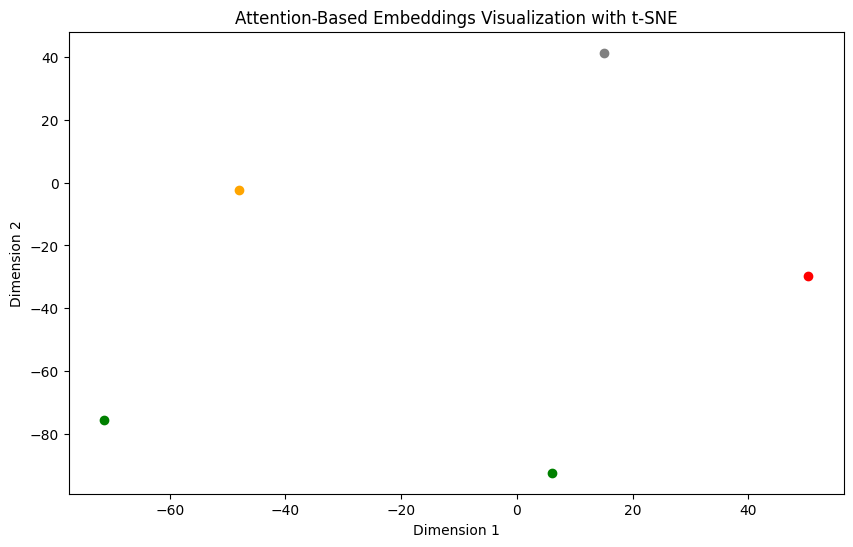

In [8]:
visualize_attention_embeddings(sample_texts)